In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing
from functools import reduce

In [2]:
xls = pd.ExcelFile('data_13variables\DB.xlsx')
mt= pd.read_excel(xls, 'MT')
v1= pd.read_excel(xls, 'V1')
v2= pd.read_excel(xls, 'V2')
v3= pd.read_excel(xls, 'V3')


In [3]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idlote                          121 non-null    int64  
 1   idanimal                        121 non-null    int64  
 2   tipo_venda                      121 non-null    object 
 3   tempo                           121 non-null    int64  
 4   venda                           121 non-null    int64  
 5   Baia                            117 non-null    float64
 6   Genero                          117 non-null    object 
 7   genotipo                        117 non-null    object 
 8   Peso_inicial                    121 non-null    int64  
 9   Peso_final                      121 non-null    float64
 10  GMD                             121 non-null    float64
 11  RC                              121 non-null    float64
 12  acum_marginal_net_value         109 

<Axes: >

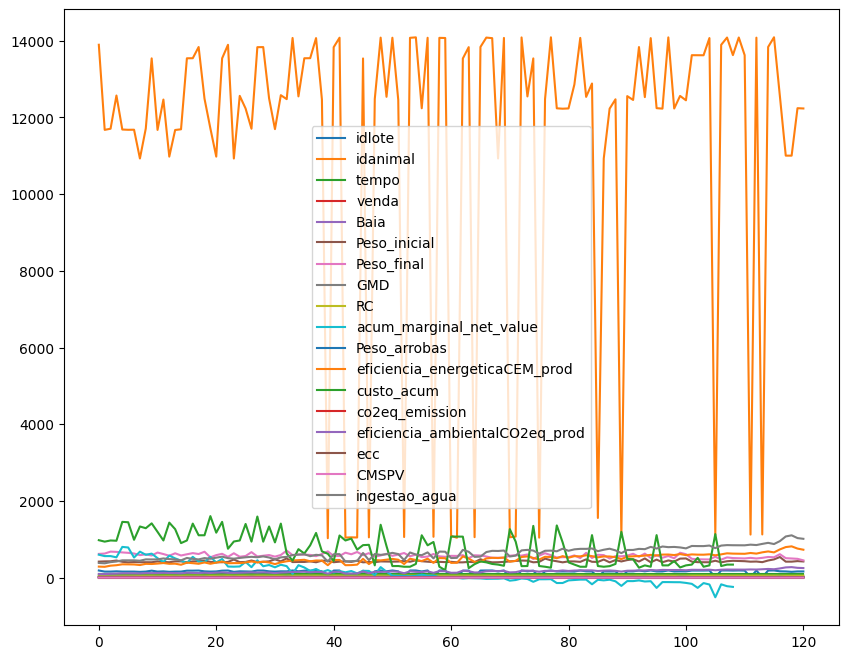

In [4]:
mt.plot(figsize = (10,8))

In [5]:
mt.isnull().sum().sort_values(ascending=False)

acum_marginal_net_value           12
custo_acum                        12
Baia                               4
Genero                             4
genotipo                           4
idlote                             0
CMSPV                              0
ecc                                0
eficiencia_ambientalCO2eq_prod     0
co2eq_emission                     0
eficiencia_energeticaCEM_prod      0
Peso_arrobas                       0
GMD                                0
RC                                 0
idanimal                           0
Peso_final                         0
Peso_inicial                       0
venda                              0
tempo                              0
tipo_venda                         0
ingestao_agua                      0
dtype: int64

In [6]:
len_mt = len(mt)
len1 = len(v1)
len2 = len(v2)
len3 = len(v3)

print("Dimensão do MT : ", len_mt, "linhas")
print("Dimensão do V1 : ", len2, "linhas")
print("Dimensão do V2 : ", len3, "linhas")
print("Dimensão do V3 : ", len1, "linhas")


Dimensão do MT :  121 linhas
Dimensão do V1 :  243 linhas
Dimensão do V2 :  243 linhas
Dimensão do V3 :  240 linhas


In [7]:
mt.describe()

,idlote,idanimal,tempo,venda,Baia,Peso_inicial,Peso_final,GMD,RC,acum_marginal_net_value,Peso_arrobas,eficiencia_energeticaCEM_prod,custo_acum,co2eq_emission,eficiencia_ambientalCO2eq_prod,ecc,CMSPV,ingestao_agua
count,121.000000,121.000000,121.0,121.0,117.000000,121.000000,121.000000,121.000000,121.000000,109.000000,121.000000,121.000000,109.00000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,149.909091,11151.264463,100.0,1.0,23.282051,427.247934,574.474910,1.472270,55.267104,127.940286,20.276816,486.113865,758.94633,9.413156,161.831298,4.537190,1.973651,645.707495
std,57.852542,4323.497623,0.0,0.0,7.059899,27.601715,54.074351,0.507574,0.886109,265.893436,1.809819,114.684300,419.38621,0.552470,39.056098,1.432023,0.040450,157.697552
min,11.000000,1029.000000,100.0,1.0,9.000000,400.000000,451.424900,0.284249,54.000000,-510.865599,15.745700,283.485400,195.30000,8.149400,94.145700,0.000000,1.875400,374.620600
25%,159.000000,11679.000000,100.0,1.0,12.000000,406.000000,534.843900,1.090718,54.500000,-70.081875,18.720000,389.267111,320.85000,9.017300,129.276027,4.000000,1.945500,513.553600
50%,165.000000,12529.000000,100.0,1.0,26.000000,420.000000,574.809897,1.472966,55.000000,48.421218,20.350300,473.823056,823.20000,9.429000,156.690400,5.000000,1.973900,626.142159
75%,186.000000,13833.000000,100.0,1.0,28.000000,437.000000,612.175900,1.862693,56.242300,300.714346,21.541900,562.214900,1105.80000,9.811300,188.212200,5.000000,2.007300,751.691200
max,188.000000,14089.000000,100.0,1.0,30.000000,539.000000,706.731500,2.523675,56.242308,802.293231,24.650800,816.965000,1605.00000,10.779100,275.184900,7.000000,2.073600,1104.400000


In [8]:
list(mt.columns)

['idlote',
 'idanimal',
 'tipo_venda',
 'tempo',
 'venda',
 'Baia',
 'Genero',
 'genotipo',
 'Peso_inicial',
 'Peso_final',
 'GMD',
 'RC',
 'acum_marginal_net_value',
 'Peso_arrobas',
 'eficiencia_energeticaCEM_prod',
 'custo_acum',
 'co2eq_emission',
 'eficiencia_ambientalCO2eq_prod',
 'ecc',
 'CMSPV',
 'ingestao_agua']

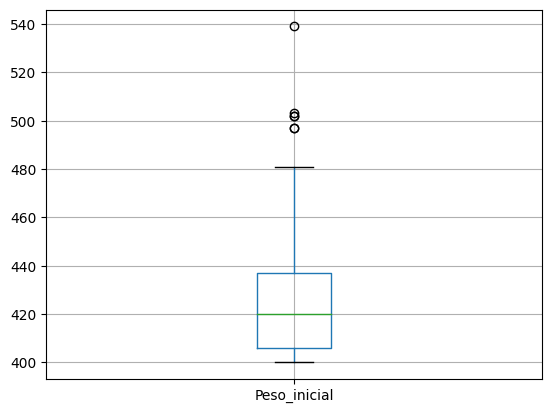

In [9]:
boxplot = mt.boxplot(column=['Peso_inicial'
 ])

boxplot.plot()

plt.show()

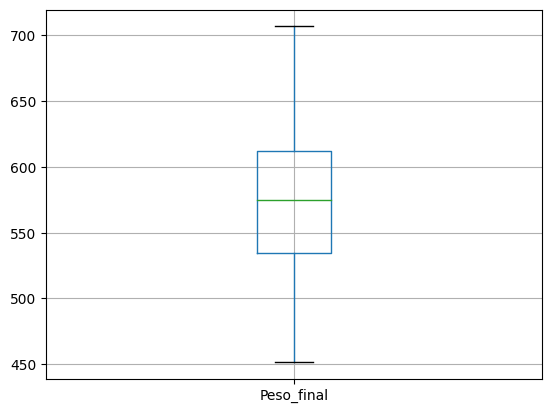

In [10]:
boxplot = mt.boxplot(column=['Peso_final'
 ])
boxplot.plot()
plt.show()

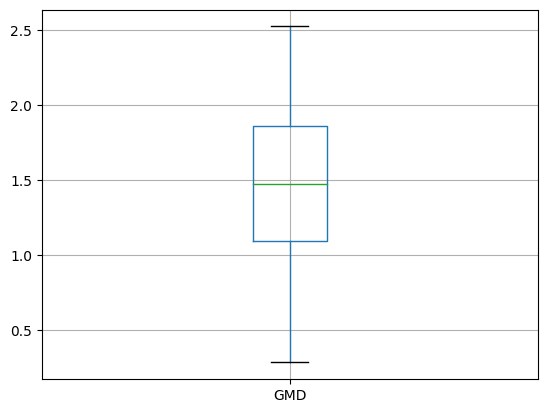

In [11]:
boxplot = mt.boxplot(column=['GMD'
 ])
boxplot.plot()
plt.show()

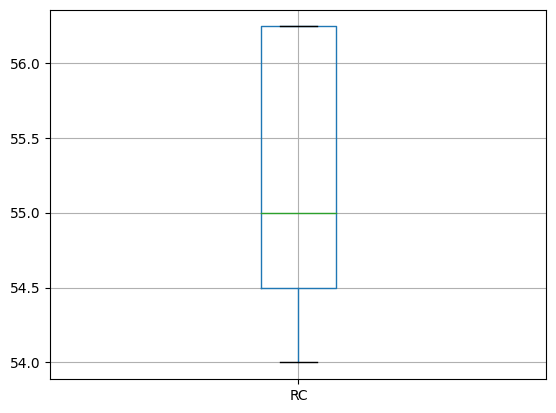

In [12]:
boxplot = mt.boxplot(column=['RC'
 ])
boxplot.plot()
plt.show()

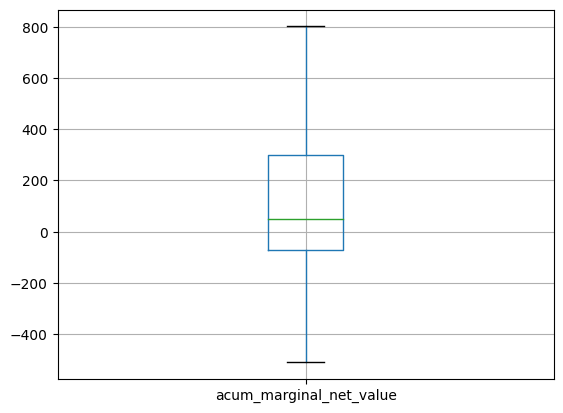

In [13]:
boxplot = mt.boxplot(column=['acum_marginal_net_value'
 ])
boxplot.plot()
plt.show()

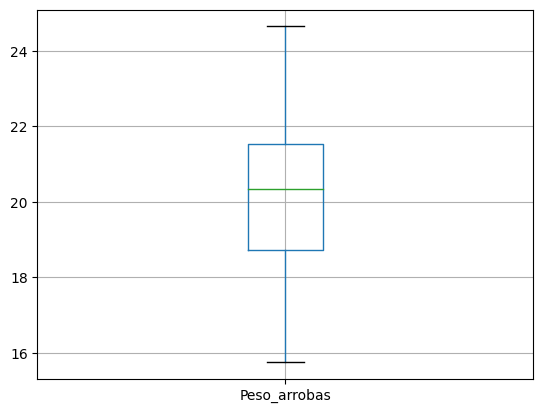

In [14]:
boxplot = mt.boxplot(column=['Peso_arrobas'
 ])
boxplot.plot()
plt.show()

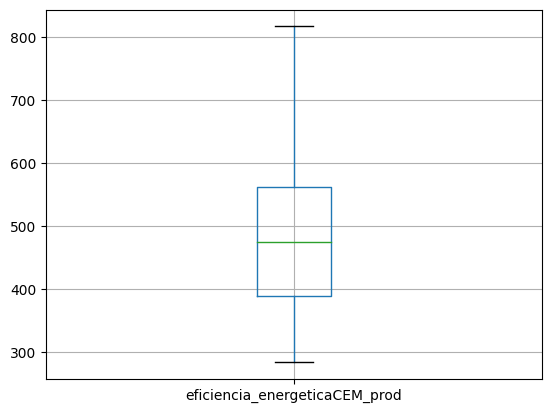

In [15]:
boxplot = mt.boxplot(column=['eficiencia_energeticaCEM_prod'
 ])
boxplot.plot()
plt.show()

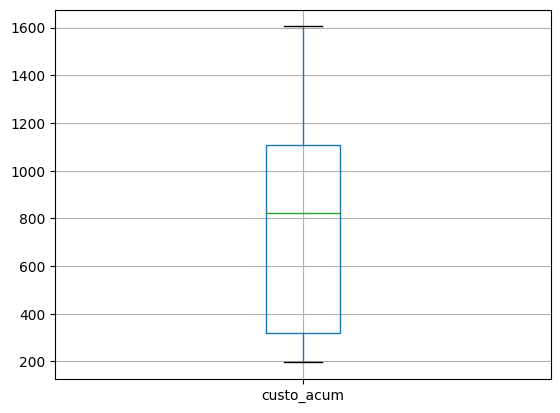

In [16]:
boxplot = mt.boxplot(column=['custo_acum'
 ])
boxplot.plot()
plt.show()

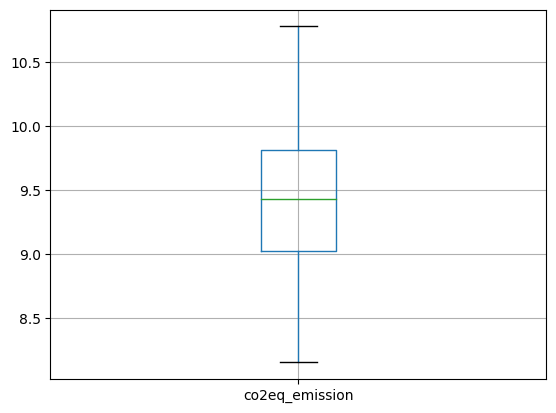

In [17]:
boxplot = mt.boxplot(column=['co2eq_emission'
 ])
boxplot.plot()
plt.show()

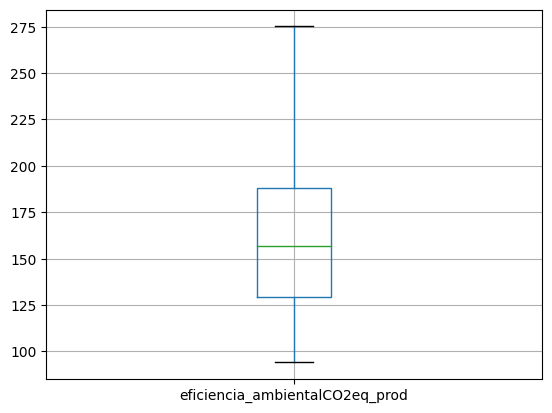

In [18]:
boxplot = mt.boxplot(column=['eficiencia_ambientalCO2eq_prod'
 ])
boxplot.plot()
plt.show()

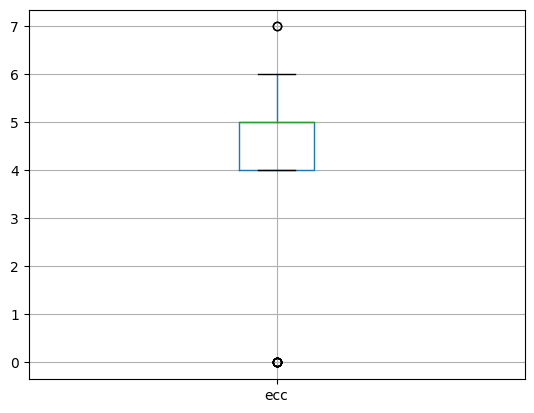

In [19]:
boxplot = mt.boxplot(column=['ecc'
 ])
boxplot.plot()
plt.show()

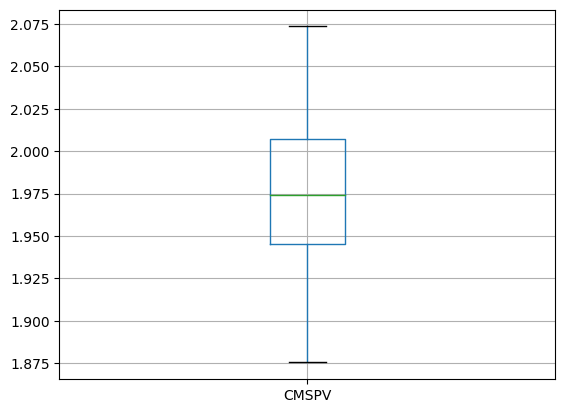

In [20]:
boxplot = mt.boxplot(column=['CMSPV'
 ])
boxplot.plot()
plt.show()

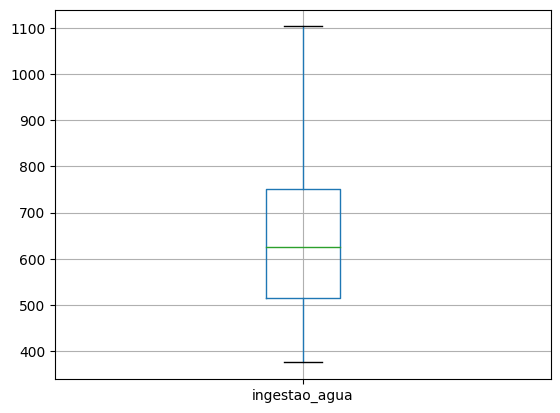

In [21]:
boxplot = mt.boxplot(column=['ingestao_agua'
 ])
boxplot.plot()
plt.show()

## Excluindo as colunas que são variáveis categóricas

In [22]:
mt_new = mt.drop(columns=['idlote',
 'idanimal',
 'tipo_venda',
 'tempo',
 'venda',
 'Baia',
 'Genero',
 'genotipo'])
mt_new.head()

,Peso_inicial,Peso_final,GMD,RC,acum_marginal_net_value,Peso_arrobas,eficiencia_energeticaCEM_prod,custo_acum,co2eq_emission,eficiencia_ambientalCO2eq_prod,ecc,CMSPV,ingestao_agua
0,419,619.6550,2.006550,56.2423,598.920214,22.3045,288.8808,977.6,9.8899,96.3045,5,1.9839,384.1643
1,425,628.9654,2.039654,54.5000,562.435990,21.9383,283.4854,940.0,9.9853,94.1457,4,1.9722,374.6206
2,427,679.3675,2.523675,54.5000,562.896554,23.6963,313.0261,970.0,10.5002,102.6331,4,1.9247,405.3268
3,447,672.6097,2.256097,54.0000,531.211718,23.2454,325.1665,963.0,10.4313,106.6532,5,1.9261,421.3341
4,414,658.5467,2.445467,54.5000,802.293231,22.9701,348.4411,1455.0,10.2877,114.4247,4,1.9303,452.5280


In [23]:
mt_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Peso_inicial                    121 non-null    int64  
 1   Peso_final                      121 non-null    float64
 2   GMD                             121 non-null    float64
 3   RC                              121 non-null    float64
 4   acum_marginal_net_value         109 non-null    float64
 5   Peso_arrobas                    121 non-null    float64
 6   eficiencia_energeticaCEM_prod   121 non-null    float64
 7   custo_acum                      109 non-null    float64
 8   co2eq_emission                  121 non-null    float64
 9   eficiencia_ambientalCO2eq_prod  121 non-null    float64
 10  ecc                             121 non-null    int64  
 11  CMSPV                           121 non-null    float64
 12  ingestao_agua                   121 

<Axes: >

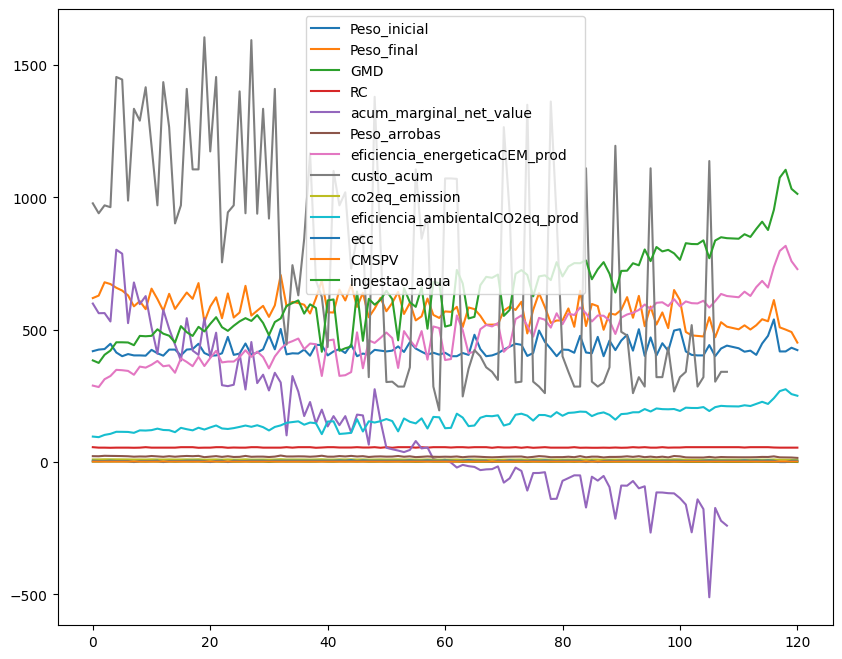

In [24]:
mt_new.plot(figsize = (10,8))

In [25]:
mt_new.shape

(121, 13)

<Axes: >

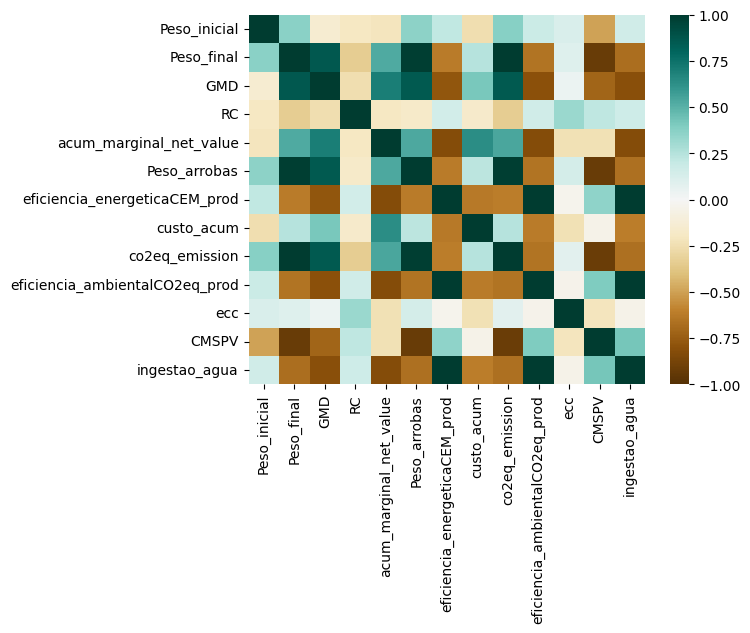

In [26]:
sns.heatmap(mt_new.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')